# Drawing from Probability Distributions
A key part of any Monte Carlo simulation is drawing random numbers from known distributions. We model certain physical systems according to various statistical behaviors characterized by probability distributions. 

# Drawing from non-uniform random distributions

In the previous section we learned how to generate random numbers from
a uniform probability distribution in an interval $[a,b]$. This
distribution was normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence, the uniform distribution *by definition* is
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$ from a uniform distribution $P(x)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ Therefore,
$$y(x)=F^{-1}(x),\label{invert}$$ 
where $F^{-1}$ is the inverse of $F$.

### Example: Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




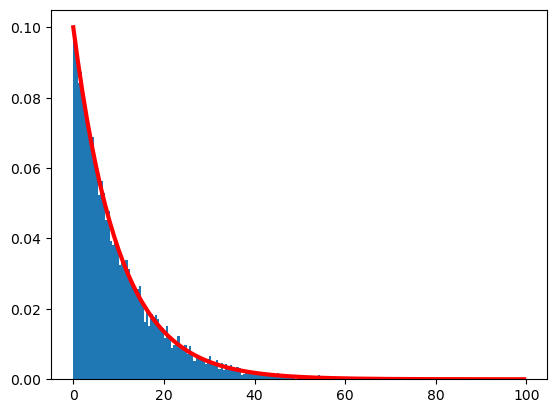

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

xlambda = 0.1 
x = -np.log(r)/xlambda

binwidth=xlambda*5

pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

# Drawing random numbers from distributions
You can draw random numbers from known distributions by using a subpackage of `scipy` called [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) or using the `random` package. `scipy.stats` contains functions relating to statistical tests and statistical distributions, both continuous and discrete. Keep this package in mind!

Here is small program that models the decay of Thallium to Lead.

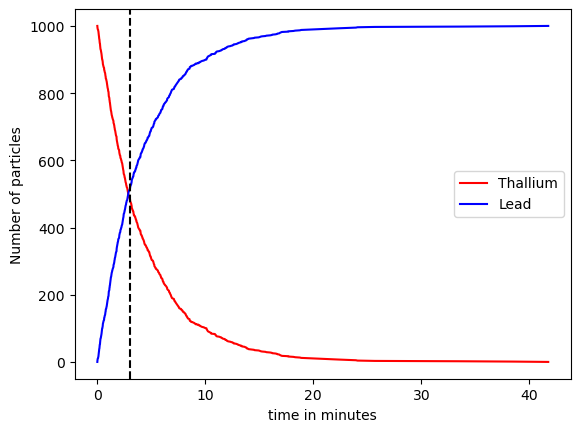

In [5]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as mp
#Script models the decay of 1000 Thallium atoms to lead by drawing from a nonuniform probability distribution
NT = 1000;
NPb = 0
#lifetime of Thallium in minutes
lifetime = 3.053/np.log(2) 

# draw exp distribution to produce a Monte Carlo Simulation
from scipy.stats import expon
#draw from exponential distribution
data_expon = expon.rvs(scale=lifetime,loc=0,size=1000)
#decays happen at random points according to exponential distribution
timepoints = np.sort(data_expon)
Tpoints = np.linspace(NT,0,NT)
Pbpoints = np.linspace(0,NT,NT)
mp.plot(timepoints,Tpoints,'r',label="Thallium")
mp.plot(timepoints,Pbpoints,'b',label="Lead")
mp.axvline(x=lifetime*np.log(2), color='k', linestyle='--')
mp.xlabel("time in minutes")
mp.ylabel("Number of particles")
mp.legend()

# Particle Physics
Many of the particles produced at accelerations like the Large Hadron Collider (LHC), Fermilab, and the Relativistic Heavy Ion Collider (RHIC) are classified as "resonances". In practical terms resonances are just unstable particles, that is particles that decay. These resonances are subject to the energy-time uncertainty principle $$\Delta E \Delta t \sim \hbar$$ that is, the mass of resonances take a range of possible values depending on their lifetime. The mass values of resonances are modeled using a Breit-Wigner distribution:
$$f(E) = \frac{k}{(E^2-M^2)^2 - \Gamma^2 M^2}$$
where
$$k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi(M^2-\gamma)},\quad \gamma = \sqrt{M^2(M^2-\Gamma^2)}$$
where *E* is the center of mass energy of the collision, *M* the central mass of the resonance, and $\Gamma$ is the decay width where the lifetime, $\tau$ is $$\tau = \frac{1}{\Gamma}.$$

The package `scipy.stats` contains functions that allow us to draw from Breit-Wigner distributions. This allows us to produce monte carlo simulations of particle interactions, compare the simulations to data, and determine whether physical theories are failing to describe some phenomena. 

In [7]:
#magic command to force display of graphics 
%matplotlib inline
import numpy as np
from scipy.stats import rel_breitwigner
import matplotlib.pyplot as mp

In [8]:
#For the Z0 boson
M = 91.1876 #GeV
gamma = 2.4952 #GeV
#the rel_breitwigner distribution takes two parameters
rZ = rel_breitwigner.rvs(M/gamma,scale = gamma, size=1000)
print(rZ)

[ 93.43450216  90.22137827  87.00501785  88.83495177  94.34304428
  90.8593114   88.8635887   91.19568447  91.94471531  90.41233699
  91.49321018  91.77565843  94.74355105  91.01187227  88.97256148
  97.74585507  93.96825837 104.65693172  82.62874511  91.18040951
  91.53018929  91.58124722  92.48650991  92.4513289   91.77213439
 118.89692488  89.35160627  89.89485847  87.86409369  93.38624404
  91.85771029 106.75532253  86.33556896  94.12046849  88.83277371
  99.89316542  90.15496279  96.7919736   89.43906974  91.68072978
  86.6174416   91.79420414  92.60256575  86.96422742  96.7914433
  90.55852362  91.62392732  90.88203558  90.89295203  88.94617931
  71.45894192  87.71082733  92.26376091  86.97997821  78.89758439
  90.87972475  93.01991821  93.40576167  89.64550795  91.32486265
  91.83278656  92.0370145   90.81446042  90.83902977  95.40387859
  92.87638978  91.70739443  98.13873099  91.16647379  89.26158224
  91.48181467  91.34132261  89.80163352  90.95177538  91.16155361
  88.494189

Text(0.5, 0, 'Center of Mass Energy $E_{cm}$ (GeV)')

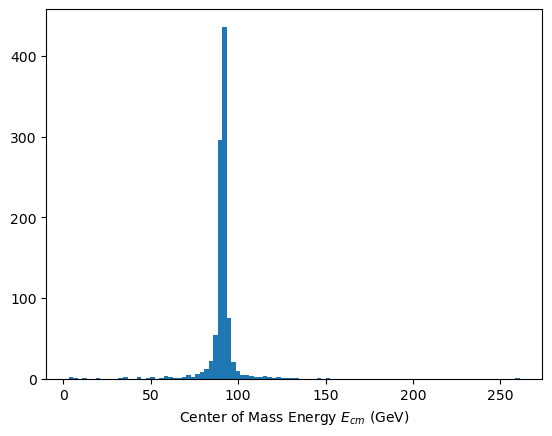

In [9]:
mp.hist(rZ,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')

In [10]:
# For the Higgs boson
mass = 125.3 #GeV
width = 0.004 #GeV
rho =mass/width
sc = width
rH = rel_breitwigner.rvs(rho,scale =sc, size=1000)
print(rH)

[125.30082922 125.29949138 125.29513946 125.29924577 125.30568068
 125.30023798 125.29505872 125.29963915 125.30261435 125.31074849
 125.29796478 125.29815915 125.3017905  125.29979357 125.29910608
 125.29784039 125.29951927 125.30288599 125.30111584 125.30008097
 125.29991714 125.30043482 125.30315992 125.30361036 125.04437222
 125.26983748 125.29385398 125.30259959 125.30330509 125.29588536
 125.29852032 125.3000926  125.38837652 125.25975493 125.30243932
 125.33877422 125.30288822 125.30289354 125.29750392 125.29524354
 125.30097295 125.2909405  125.29105339 125.30868144 125.30645454
 125.30356014 125.29715295 125.29724708 125.29414961 125.29910461
 125.30886489 125.29981639 125.29864339 125.34033596 125.30374522
 125.30079238 125.29533159 125.29943041 125.29976848 125.30143046
 125.30116198 125.30207563 125.30249905 125.30036788 125.30031065
 125.29860487 125.2998564  125.30143618 125.29565396 125.29975959
 125.29954191 125.30123622 125.29964953 125.29983452 125.29349904
 125.29849

(array([  3.,   2.,   1.,  51., 932.,   5.,   1.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([124.98136292, 125.05825018, 125.13513744, 125.2120247 ,
        125.28891197, 125.36579923, 125.44268649, 125.51957375,
        125.59646101, 125.67334827, 125.75023554, 125.8271228 ,
        125.90401006, 125.98089732, 126.05778458, 126.13467185,
        126.21155911, 126.28844637, 126.36533363, 126.44222089

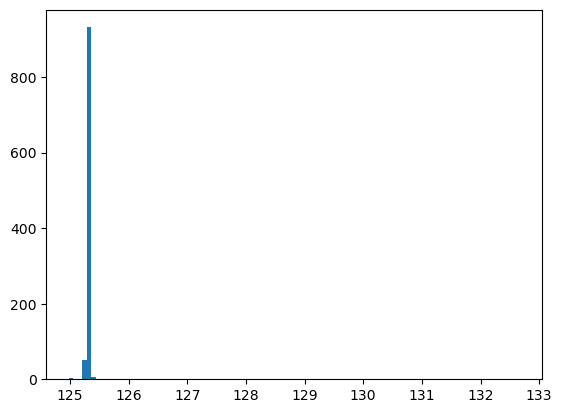

In [11]:
mp.hist(rH,bins=100)

In [12]:
#combine random lists
rT = np.concatenate((rZ,rH),axis=None)
print(rT)

[ 93.43450216  90.22137827  87.00501785 ... 125.29495584 125.30467968
 125.2949958 ]


(array([  2.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   0.,   2.,   0.,   1.,   2.,   0.,   1.,   3.,
          2.,   1.,   1.,   2.,   4.,   2.,   6.,   8.,  12.,  22.,  54.,
        296., 436.,  75.,  21.,  10.,   5.,   4.,   3.,   2.,   2.,   3.,
          2.,   1.,   2., 999.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  3.11149969,   5.69195152,   8.27240335,  10.85285518,
         13.43330701,  16.01375884,  18.59421067,  21.1746625 ,
         23.75511433,  26.33556616,  28.91601799,  31.49646982,
         34.07692165,  36.65737348,  39.23782531,  41.81827714,
         44.39872898,  46.97918081,  49.55963264,  52.14008447

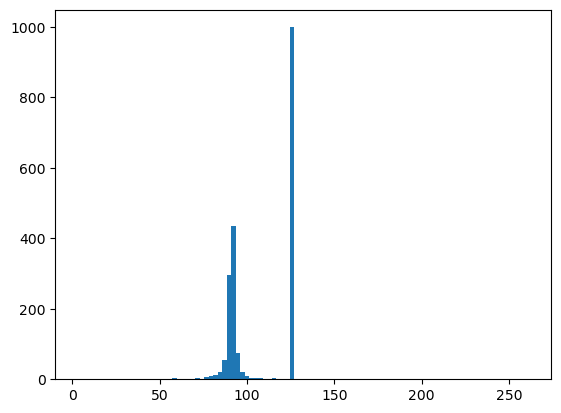

In [13]:
#what the reconstruction from accelerator detectors would look like in an ideal world
mp.hist(rT, bins=100)

## The key difference between `random` and `numpy.random` and `scipy.stats`
You can draw from the same distributions whether using the `random`, `numpy.random`, or the `scipy.stats` package. The difference comes down to convenience. 'random' package functions tend to only draw 1 number at a time. 

In [14]:
import random as rn
rn.expovariate(lambd = 2)

0.07370632338621488

(array([79., 84., 79., 65., 76., 51., 48., 42., 33., 39., 41., 24., 35.,
        37., 28., 16., 15., 16., 14., 15.,  9., 12., 17.,  9.,  8., 11.,
         6.,  9.,  9.,  8.,  7.,  6.,  5.,  3.,  6.,  3.,  2.,  3.,  3.,
         5.,  0.,  0.,  2.,  3.,  3.,  2.,  0.,  2.,  1.,  2.,  0.,  0.,
         1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.87025187e-04, 4.51070819e-02, 8.94271386e-02, 1.33747195e-01,
        1.78067252e-01, 2.22387309e-01, 2.66707365e-01, 3.11027422e-01,
        3.55347479e-01, 3.99667536e-01, 4.43987592e-01, 4.88307649e-01,
        5.32627706e-01, 5.76947762e-01, 6.21267819e-01, 6.65587876e-01,
        7.09907933e-01, 7.54227989e-01, 7.98548046e-01, 8.42868103e-01,
        8.87188159e-01, 9.31508216e-01, 9.75828273e-01, 1.02014833e+00,
  

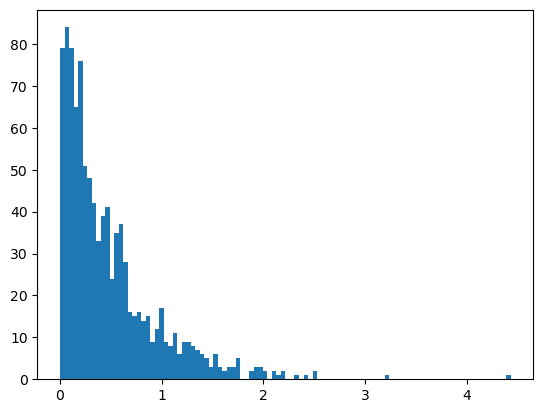

In [15]:
#More machinary is needed to get multiple numbers from expovariate
exp = []
for k in range(1, 1000):
    rando = rn.expovariate(lambd=2)
    exp.append(rando)
mp.hist(exp,bins=100)